In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import commons as cmns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [218]:
data = pd.read_csv('btc_data.csv',sep=',')

In [219]:
interval1 = (data['Date'] >= '2013/04/01') & (data['Date'] <= '2016/04/01')
interval2 = (data['Date'] >= '2013/04/01') & (data['Date'] <= '2017/04/01')
interval3 = (data['Date'] >= '2013/04/01') & (data['Date'] <= '2019/12/31')

In [220]:
one = data['priceUSD'].shift(-1,fill_value = 1)
seven = data['priceUSD'].shift(-7,fill_value = 1)
fourteen = data['priceUSD'].shift(-14,fill_value = 1)
thirty = data['priceUSD'].shift(-30,fill_value = 1)
sixty = data['priceUSD'].shift(-60,fill_value = 1)
ninety = data['priceUSD'].shift(-90,fill_value = 1)

In [221]:
df = data.loc[interval1]

In [222]:
df.shape

(1097, 737)

In [223]:
X_raw = df.iloc[:,2:17]

In [224]:
y = np.ravel(df.iloc[:, 1:2])

In [225]:
features_list = []
technical_indicators = ['sma','ema','wma','trx','mom','std','var','rsi','roc']
periods = ['3','7','14','30','90']
for i in technical_indicators:
    for j in periods:
        string=str(j)+str(i)
        X=df.filter(like=string,axis=1)
        X=SimpleImputer(missing_values=0,strategy='most_frequent').fit_transform(X)
        X=pd.DataFrame(X)
        X.columns=df.filter(like=string,axis=1).columns
        rf1=RandomForestRegressor(random_state=7,n_jobs=-1)
        rfecv=RFECV(rf1,step=0.9,min_features_to_select=1,verbose=1,cv=5,scoring='neg_mean_absolute_error', n_jobs=-1)
        rfecv.fit(X,y)
        if rfecv.n_features_>1:
            rf1.fit(X,y)
            maximp=rf1.feature_importances_.max()
            for x in range(len(rf1.feature_importances_)):
                if maximp==rf1.feature_importances_[x]:
                    new_features = X.columns[x]
        else:
            mask = rfecv.get_support()
            new_features = X.columns[mask]
        features_list.append(str(new_features))
        print(string+': '+new_features)

Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['3sma: price3smaUSD'], dtype='object')
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['7sma: price7smaUSD'], dtype='object')
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['14sma: price14smaUSD'], dtype='object')
30sma: transactionvalue30smaUSD
90sma: mediantransactionvalue90smaUSD
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['3ema: price3emaUSD'], dtype='object')
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['7ema: price7emaUSD'], dtype='object')
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['14ema: price14emaUSD'], dtype='object')
Fitting estimator with 16 features.
30ema: transactionvalue30emaUSD
90ema: transactionvalue90emaUSD
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['3wma: price3wmaUSD'], dtype='object')
Fitting

In [226]:
l1=[]
for j in range(len(features_list)):
    result1 = re.search("'(.*)'],", features_list[j])
    if result1!=None:
        l1.append(result1.group(1))
for i in range(len(features_list)):
    result2 = re.search('.*',features_list[i])
    if len(result2.group(0))<33:
        l1.append(result2.group(0))

In [227]:
l1.sort()

In [228]:
l1

['difficulty14mom',
 'difficulty14roc',
 'difficulty14rsi',
 'difficulty14trx',
 'difficulty30mom',
 'difficulty30roc',
 'difficulty30rsi',
 'difficulty3trx',
 'difficulty7roc',
 'difficulty7trx',
 'difficulty90roc',
 'difficulty90rsi',
 'fee_to_reward30trxUSD',
 'fee_to_reward90trxUSD',
 'hashrate3std',
 'hashrate3var',
 'hashrate7mom',
 'mediantransactionvalue90smaUSD',
 'mining_profitability3mom',
 'mining_profitability7rsi',
 'mining_profitability7std',
 'mining_profitability7var',
 'price14emaUSD',
 'price14smaUSD',
 'price14wmaUSD',
 'price30wmaUSD',
 'price3emaUSD',
 'price3rsiUSD',
 'price3smaUSD',
 'price3wmaUSD',
 'price7emaUSD',
 'price7smaUSD',
 'price7wmaUSD',
 'price90momUSD',
 'sentinusd30stdUSD',
 'sentinusd30varUSD',
 'sentinusd90stdUSD',
 'sentinusd90varUSD',
 'transactionfees3rocUSD',
 'transactionvalue14stdUSD',
 'transactionvalue14varUSD',
 'transactionvalue30emaUSD',
 'transactionvalue30smaUSD',
 'transactionvalue90emaUSD',
 'transactionvalue90wmaUSD']

In [229]:
df_reduced=df[l1]

In [230]:
df_reduced.head()

,difficulty14mom,difficulty14roc,difficulty14rsi,difficulty14trx,difficulty30mom,difficulty30roc,difficulty30rsi,difficulty3trx,difficulty7roc,difficulty7trx,...,sentinusd30varUSD,sentinusd90stdUSD,sentinusd90varUSD,transactionfees3rocUSD,transactionvalue14stdUSD,transactionvalue14varUSD,transactionvalue30emaUSD,transactionvalue30smaUSD,transactionvalue90emaUSD,transactionvalue90wmaUSD
989,1848179.0,38.125,99.825,1.930,2327950.0,53.297,97.889,0.845,0.000,2.593,...,2.698640e+15,88825639,1.972499e+15,-8.219,1325.0,438600.0,2019.0,1883.0,1335.0,1380.0
990,1848179.0,38.125,99.825,1.948,2327950.0,53.297,97.889,0.520,0.000,2.333,...,3.541060e+15,100243842,2.512207e+15,10.080,1673.0,699432.0,2172.0,2012.0,1403.0,1454.0
991,1848179.0,38.125,99.825,1.943,2327950.0,53.297,97.889,0.314,0.000,2.064,...,4.321521e+15,110663079,3.061579e+15,42.924,1939.0,940396.0,2321.0,2144.0,1470.0,1528.0
992,1848179.0,38.125,99.825,1.917,2327950.0,53.297,97.889,0.187,0.000,1.801,...,5.132381e+15,119905933,3.594358e+15,81.728,2083.0,1085025.0,2446.0,2244.0,1531.0,1597.0
993,2157411.0,44.504,99.867,1.888,2637182.0,60.377,98.186,0.689,4.618,1.634,...,5.734210e+15,126900119,4.025910e+15,15.109,2108.0,1110469.0,2568.0,2341.0,1593.0,1667.0


In [231]:
X=cmns.drop_high_vif(df_reduced,thresh=5)

dropping 'sentinusd30stdUSD' at index: 34
dropping 'sentinusd90stdUSD' at index: 35
Remaining variables:
Index(['difficulty14mom', 'difficulty14roc', 'difficulty14rsi',
       'difficulty14trx', 'difficulty30mom', 'difficulty30roc',
       'difficulty30rsi', 'difficulty3trx', 'difficulty7roc', 'difficulty7trx',
       'difficulty90roc', 'difficulty90rsi', 'fee_to_reward30trxUSD',
       'fee_to_reward90trxUSD', 'hashrate3std', 'hashrate3var', 'hashrate7mom',
       'mediantransactionvalue90smaUSD', 'mining_profitability3mom',
       'mining_profitability7rsi', 'mining_profitability7std',
       'mining_profitability7var', 'price14emaUSD', 'price14smaUSD',
       'price14wmaUSD', 'price30wmaUSD', 'price3emaUSD', 'price3rsiUSD',
       'price3smaUSD', 'price3wmaUSD', 'price7emaUSD', 'price7smaUSD',
       'price7wmaUSD', 'price90momUSD', 'sentinusd30varUSD',
       'sentinusd90varUSD', 'transactionfees3rocUSD',
       'transactionvalue14stdUSD', 'transactionvalue14varUSD',
       'transa

In [232]:
X.shape

(1097, 43)

In [233]:
cmns.vif_values(X)

difficulty14mom                   1.535715
difficulty14roc                   0.563511
difficulty14rsi                   0.040241
difficulty14trx                   0.432445
difficulty30mom                   1.682610
difficulty30roc                   0.518523
difficulty30rsi                   0.021262
difficulty3trx                    0.676706
difficulty7roc                    0.678445
difficulty7trx                    0.476028
difficulty90roc                   0.606153
difficulty90rsi                   0.010355
fee_to_reward30trxUSD             1.076364
fee_to_reward90trxUSD             1.065714
hashrate3std                      3.031506
hashrate3var                      4.646632
hashrate7mom                      1.053708
mediantransactionvalue90smaUSD    0.219409
mining_profitability3mom          0.998009
mining_profitability7rsi          0.042821
mining_profitability7std          0.928434
mining_profitability7var          0.985264
price14emaUSD                     0.264267
price14smaU

In [234]:
Raw=cmns.drop_high_vif(X_raw,thresh=10)

dropping 'hashrate' at index: 4
dropping 'sentbyaddress' at index: 2
dropping 'top100cap' at index: 11
dropping 'transactions' at index: 0
dropping 'size' at index: 0
dropping 'transactionvalueUSD' at index: 6
dropping 'activeaddresses' at index: 7
dropping 'median_transaction_feeUSD' at index: 4
Remaining variables:
Index(['difficulty', 'mining_profitability', 'sentinusdUSD',
       'transactionfeesUSD', 'confirmationtime', 'mediantransactionvalueUSD',
       'fee_to_rewardUSD'],
      dtype='object')


In [235]:
cmns.vif_values(Raw)

difficulty                   4.399881
mining_profitability         1.876837
sentinusdUSD                 1.638621
transactionfeesUSD           9.419428
confirmationtime             5.818466
mediantransactionvalueUSD    6.841771
fee_to_rewardUSD             7.305746
dtype: float64

In [236]:
# Merge features
Raw['Date']=df['Date']

C:\Users\Amirh\AppData\Local\Temp\ipykernel_12744\2356119945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw['Date']=df['Date']


In [237]:
X['Date']=df['Date']

C:\Users\Amirh\AppData\Local\Temp\ipykernel_12744\227219659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date']=df['Date']


In [238]:
df_merged=Raw.merge(X.drop_duplicates(subset='Date'),how='left')

In [239]:
df_merged.shape

(1097, 51)

In [240]:
 # Final feature selection
df_merged.drop(columns='Date',inplace=True)

In [241]:
X=cmns.drop_high_vif(df_merged,thresh=10)

Remaining variables:
Index(['difficulty', 'mining_profitability', 'sentinusdUSD',
       'transactionfeesUSD', 'confirmationtime', 'mediantransactionvalueUSD',
       'fee_to_rewardUSD', 'difficulty14mom', 'difficulty14roc',
       'difficulty14rsi', 'difficulty14trx', 'difficulty30mom',
       'difficulty30roc', 'difficulty30rsi', 'difficulty3trx',
       'difficulty7roc', 'difficulty7trx', 'difficulty90roc',
       'difficulty90rsi', 'fee_to_reward30trxUSD', 'fee_to_reward90trxUSD',
       'hashrate3std', 'hashrate3var', 'hashrate7mom',
       'mediantransactionvalue90smaUSD', 'mining_profitability3mom',
       'mining_profitability7rsi', 'mining_profitability7std',
       'mining_profitability7var', 'price14emaUSD', 'price14smaUSD',
       'price14wmaUSD', 'price30wmaUSD', 'price3emaUSD', 'price3rsiUSD',
       'price3smaUSD', 'price3wmaUSD', 'price7emaUSD', 'price7smaUSD',
       'price7wmaUSD', 'price90momUSD', 'sentinusd30varUSD',
       'sentinusd90varUSD', 'transactionfees3rocU

In [242]:
X.shape

(1097, 50)

In [243]:
cmns.vif_values(X)

difficulty                        1.383725
mining_profitability              0.880295
sentinusdUSD                      1.100001
transactionfeesUSD                0.341585
confirmationtime                  0.017395
mediantransactionvalueUSD         0.357440
fee_to_rewardUSD                  0.418142
difficulty14mom                   1.535819
difficulty14roc                   0.563529
difficulty14rsi                   0.040250
difficulty14trx                   0.432463
difficulty30mom                   1.683284
difficulty30roc                   0.518539
difficulty30rsi                   0.021267
difficulty3trx                    0.676725
difficulty7roc                    0.678463
difficulty7trx                    0.476047
difficulty90roc                   0.606164
difficulty90rsi                   0.010358
fee_to_reward30trxUSD             1.076395
fee_to_reward90trxUSD             1.065742
hashrate3std                      3.031728
hashrate3var                      8.460526
hashrate7mo

In [244]:
if 'priceUSD' in X.columns:
    X.drop(columns='priceUSD',inplace=True)

In [245]:
# Feature importance
rf_final=RandomForestRegressor(random_state=7,n_jobs=-1)

In [246]:
rf_final.fit(X,y)

RandomForestRegressor(n_jobs=-1, random_state=7)

In [247]:
imp_feat=cmns.feature_importance(X.columns,rf_final.feature_importances_)

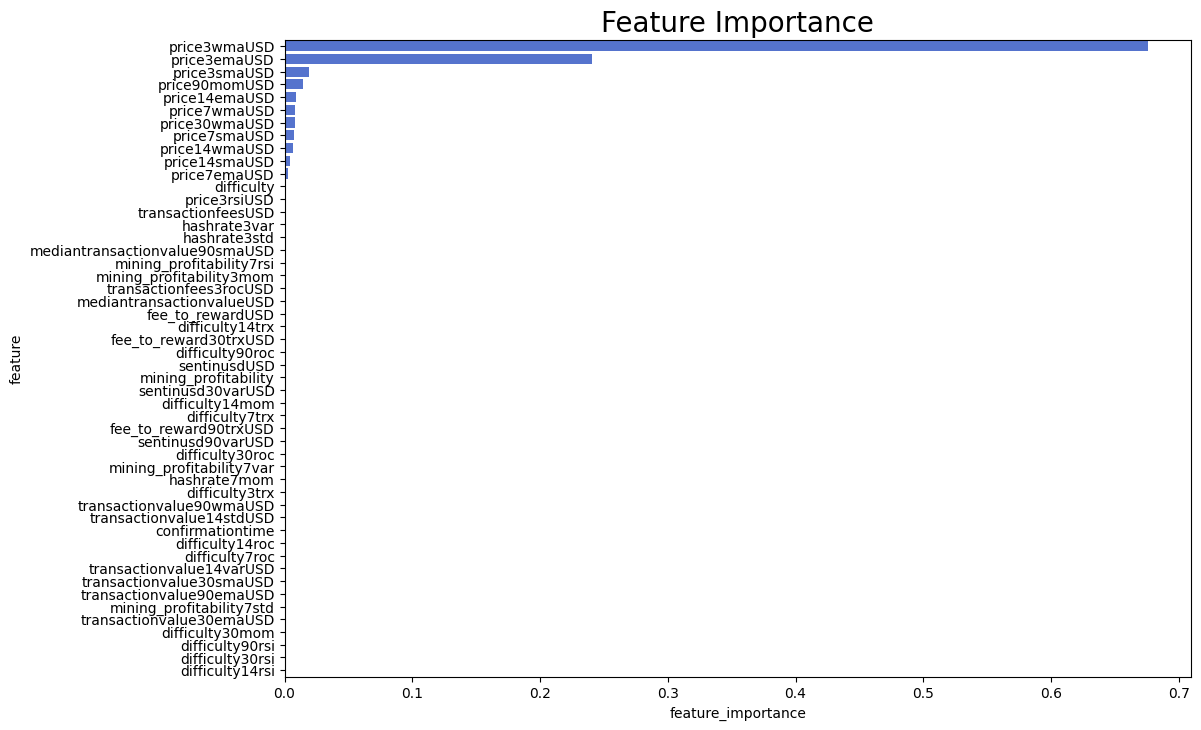

In [248]:
cmns.plot_feature_importance(imp_feat,'Feature Importance')

In [249]:
imp_feat[imp_feat['feature_importance']>0]


,feature,feature_importance
0,price3wmaUSD,0.675952
1,price3emaUSD,0.240631
2,price3smaUSD,0.019485
3,price90momUSD,0.014256
4,price14emaUSD,0.009264
5,price7wmaUSD,0.008393
6,price30wmaUSD,0.008060
7,price7smaUSD,0.007262
8,price14wmaUSD,0.006352
9,price14smaUSD,0.004064


In [250]:
# Select most important features
cols=[0,3,5,7,11,13,14,16,18,19,20,21]

In [251]:
selected=imp_feat.filter(cols,axis=0)

In [252]:
selected

,feature,feature_importance
0,price3wmaUSD,0.675952
3,price90momUSD,0.014256
5,price7wmaUSD,0.008393
7,price7smaUSD,0.007262
11,difficulty,0.001151
13,transactionfeesUSD,0.000122
14,hashrate3var,0.000117
16,mediantransactionvalue90smaUSD,0.000082
18,mining_profitability3mom,0.000074
19,transactionfees3rocUSD,0.000061


In [253]:
selected.feature_importance.sum()

np.float64(0.7075913671981048)

In [254]:
# High importance features
X_high=X[selected.feature]

In [255]:
X_high.shape

(1097, 12)

In [256]:
X_high.sort_index(axis=1, inplace=True)

C:\Users\Amirh\AppData\Local\Temp\ipykernel_12744\2053484818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_high.sort_index(axis=1, inplace=True)


In [257]:
X_high['priceUSD'] = y

C:\Users\Amirh\AppData\Local\Temp\ipykernel_12744\115530091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_high['priceUSD'] = y


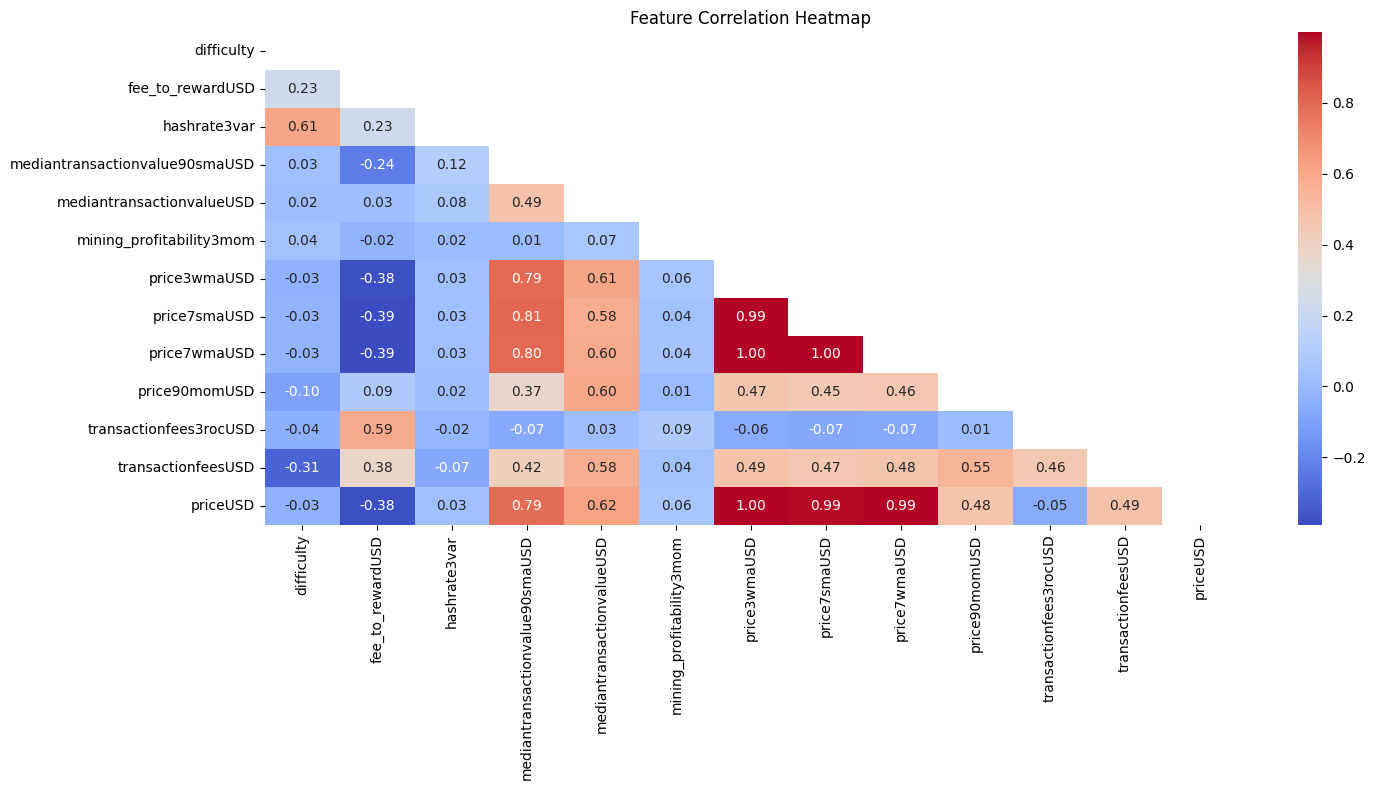

In [258]:
# Correlation heatmap
corr = X_high.corr()
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [259]:
# Remove outliers
X_high=X_high[X_high['priceUSD']!=1]

In [260]:
outlier = IsolationForest(contamination=0.45)
price = X_high['priceUSD'].values.reshape(-1, 1)
outlier.fit(price)
outs = outlier.predict(price)
X_high['outlier'] = outs
X_high = X_high.query('outlier != -1')
X_high.reset_index(drop=True, inplace=True)
X_high.drop(columns=['outlier'], inplace=True)

In [261]:
# VMD Processing
# Separate target and features
y_vmd = X_high['priceUSD'].values
X_features = X_high.drop(columns=['priceUSD']).values

# VMD Parameters
alpha = 2000  # Balancing parameter
tau = 0       # Noise-tolerance
K = 3         # Number of modes
DC = 0        # No DC mode
init = 1      # Initialize modes randomly
tol = 1e-7

# Apply VMD
u, _, _ = VMD(y_vmd, alpha, tau, K, DC, init, tol)

# Ensure consistent dimensions
min_size = min(u.T.shape[0], X_features.shape[0])

# Combine VMD components with features
X_vmd = np.hstack((u.T[:min_size, :], X_features[:min_size, :]))

In [262]:
 # Convert to DataFrame
X_vmd_df = pd.DataFrame(X_vmd, columns=[f'feature_{i}' for i in range(X_vmd.shape[1])])

# Save to CSV
X_vmd_df.to_csv('reg_interval1.csv', index=False)

In [263]:
X_high.columns

Index(['difficulty', 'fee_to_rewardUSD', 'hashrate3var',
       'mediantransactionvalue90smaUSD', 'mediantransactionvalueUSD',
       'mining_profitability3mom', 'price3wmaUSD', 'price7smaUSD',
       'price7wmaUSD', 'price90momUSD', 'transactionfees3rocUSD',
       'transactionfeesUSD', 'priceUSD'],
      dtype='object')